# OrthoNode
The OrthoNode class in Geomapi represents the data and metadata of Orthogonal Photos, often derived from photogrammetric reconstructions. The metadata builds upon the RDFlib framework:

[https://rdflib.readthedocs.io/](https://rdflib.readthedocs.io/) 

The code below shows how to create a OrthoNode from various inputs.

First the geomapi and external packages are imported

In [1]:
#IMPORT PACKAGES
from rdflib import Graph
import os
import numpy as np

#IMPORT MODULES
from context import geomapi #context import for documentation only
from geomapi.nodes import OrthoNode

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## OrthoNode Creation

A OrthoNode is constructed using the same parameters as the base Node. Please refer to [Node Tutorial](../tutorial/tutorial_nodes.ipynb) For more info about Node Creation

In [ ]:
OrthoNode( subject = None,             # (URIRef, optional) : A subject to use as identifier for the Node.
          graph = None,               # (Graph, optional) : An RDF Graph to parse.
          graphPath = None,           # (Path, optional) : The path of an RDF Graph to parse.
          name = None,                # (str, optional) : A name of the Node.
          path = None,                # (Path, optional) : A filepath to a resource.
          timestamp = None,           # (str, optional) : Timestamp for the node.
          resource = None,            # (optional) : Resource associated with the node.
          cartesianTransform = None,  # (np.ndarray, optional) : The (4x4) transformation matrix.
          orientedBoundingBox = None, # (o3d.geometry.OrientedBoundingBox, optional) : The oriented bounding box of the node.
          convexHull = None,          # (o3d.geometry.TriangleMesh, optional) : The convex hull of the node.
          loadResource = False,       # Load the resource at initialization?
          dxfPath = None,             # (Path, Optional) : Path to the dxf file with the orthometadata from MetaShape.
          tfwPath = None,             # (Path, Optional) : Path to the tfw file with the orthometadata from MetaShape.
          imageWidth = None,          # (int, Optional) : width of the image in pixels (u). Defaults to 2000pix
          imageHeight = None,         # (int, Optional) : height of the image in pixels (v). Defaults to 1000pix
          gsd = None,                 # (float, Optional) : Ground Sampling Distance in meters. Defaults to 0.01m
          depth = None,               # (float, Optional) : Average depth of the image in meters. Defaults to 10m
          height = None               # (float, Optional) : Average height of the cameras that generated the image in meters.
        )

### Ontology link

The OrthoNode has 7 new standard properties that are serialized to the graph:

| python name | predicate |
|-----------  |-----------|
| `dxfPath` | `geomapi:dxfPath` |
| `tfwPath` | `geomapi:tfwPath` |
| `imageWidth` | `exif:imageWidth` |
| `imageHeight` | `exif:imageLength` |
| `gsd` | `geomapi:gsd` |
| `depth` | `geomapi:depth` |
| `height` | `geomapi:height` |


### Creation From tfw file

OrthoNodes can be created from accompanying tfw files, these provide extra metadata like the `gsd` and `cartesianTransform`.

In [8]:
node = OrthoNode(tfwPath=r"../../../tests\testfiles\ortho\railway-0-0.tfw")
print(node.gsd)
print(node.cartesianTransform)

0.01560589037
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  2.63379145e+05]
 [ 0.00000000e+00 -1.00000000e+00  0.00000000e+00  1.51097344e+05]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


### Creation From dxf file

OrthoNodes can be created from autocad dfx files.
Since dxf files contain a large amount of elements, they cannot be loaded directly into a OrthoNodes.
Use the [`geomapi.tools.dxf_to_ortho_nodes`](../geomapi/geomapi.tools.html#geomapi.tools.dxf_to_ortho_nodes) function to load all elements into a list of OrthoNode.

In [9]:
import geomapi.tools as tl

linesetnodes = tl.dxf_to_ortho_nodes(dxfPath = r"../../..\tests\testfiles\ortho\railway-scheme.dxf")

Reading DXF file from ..\..\..\tests\testfiles\ortho\railway-scheme.dxf...
Loaded 1 OrthoNodes from DXF.


## OrthoNode Resource

When creating a Node with a resource, it can be done either directly with the resource, or with the path to the resource.

A resource can be a big piece of data, this is why it is not always wanted to load the whole resource at initialization. This is why the `loadResource` parameter is default to `False`

For more info on specific resources, see the corresponding Node type

### Loading The Resource

In [2]:
node = OrthoNode(path=r"../../../tests\testfiles\ortho\railway-0-0.tif", loadResource=False)
print("resource before loading:",node.resource)
node.load_resource() # Use specialized node fo each type of resource.
print("resource after loading:",node.resource)

Resource not loaded, but path is defined, call `load_resource()` to access it.
Resource not loaded, but path is defined, call `load_resource()` to access it.
Resource not loaded, but path is defined, call `load_resource()` to access it.
resource before loading: None
resource after loading: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 90  87  80]
  [100  93  92]
  [ 88  80  79]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 97  90  85]
  [ 97  94  92]
  [ 92  90  83]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 89  83  81]
  [106 103 106]
  [ 92  86  83]]]


### Saving The Resource

A Ortho resource can be saved to disk using the `save_resource()` function.
Currently supports: .ply, .obj

In [3]:
node = OrthoNode(path=r"../../../tests\testfiles\ortho\railway-0-0.tif", loadResource=True)
node.save_resource(directory=r"../../../tests/testfiles/resources", extension=".tif") # Save the resource to the resourcePath

True

## OrthoNode Transformation

Since every nod has a cartesian transform, it can be transformed using the `node.transform()` function.

The transformation also updates the `convexHull` and `orientedBoundingBox`.

Furthermore, if the OrthoNode has a resource, that resource is also transformed.

In [4]:
node = OrthoNode()
print(node.cartesianTransform)
transformation = np.array([[0,0,1,0],[0,1,0,0],[1,0,0,0],[0,0,0,1]])
node.transform(transformation=transformation)
print("applying transformation: (-1)")
print(node.cartesianTransform,"\n")

node = OrthoNode()
rotation = np.array([90,0,0]) #eulers in degrees
node.transform(rotation=rotation)
print("applying rotation: (90,0,0)")
print(node.cartesianTransform,"\n")

node = OrthoNode()
translation = np.array([1,2,3])
node.transform(translation=translation)
print("applying translation: (1,2,3)")
print(node.cartesianTransform)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
applying transformation: (-1)
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]] 

applying rotation: (90,0,0)
[[ 1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]] 

applying translation: (1,2,3)
[[1. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 1. 3.]
 [0. 0. 0. 1.]]


## OrthoNode Visualisation

When a OrthoNode has a resource, the `show()` function displays the Orthophoto using PIL

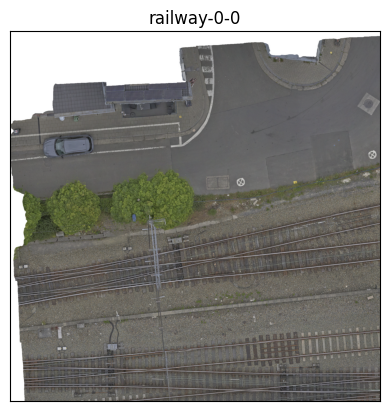

In [2]:
node = OrthoNode(path=r"../../../tests\testfiles\ortho\railway-0-0.tif", loadResource=True)
node.show()

## Further reading

Please refer to the full [API documentation](../geomapi/geomapi.nodes.Orthonode.rst) of the OrthoNode class for more details about the functionality